In [1]:
import scvelo as scv
import scanpy as sc


I want to visualize correlations between transcription factors and the respective velocity of the cell. Starting with Tox and the other 10 mentioned in the excel file. I can just as well use the velocity data; it has everything.
-> reconstruct this myself someplace else. 

In [2]:
# import raw data and velocities
rdata = sc.read_h5ad("raw_dario_chronic.h5ad")
vdata = sc.read_h5ad("velocity_adata.h5ad")


In [3]:
vdata

AnnData object with n_obs × n_vars = 13694 × 8009
    obs: '_X', '_Y', 'sampleID', 'custom_louvain', 'louvain', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'custom_clustering'
    var: 'Accession-0', 'Chromosome-0', 'End-0', 'Start-0', 'Strand-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1', 'Accession-2', 'Chromosome-2', 'End-2', 'Start-2', 'Strand-2', 'Accession-3', 'Chromosome-3', 'End-3', 'Start-3', 'Strand-3', 'Accession-4', 'Chromosome-4', 'End-4', 'Start-4', 'Strand-4', 'Accession-5', 'Chromosome-5', 'End-5', 'Start-5', 'Strand-5', 'gene_count_corr', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'Clusters_colors', 'T_backward', 'T_forward', 'cluster_key', 'custom_clustering_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'sampleID_colors', 'true_lineages', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocit

In [4]:
vdata.obs

,_X,_Y,sampleID,custom_louvain,louvain,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition,root_cells,end_points,custom_clustering
index,,,,,,,,,,,,,
AACTCTTCACGAGAGT-1-0,25.610258,-3.319378,0,root,2,11480.0,1705.0,11480.0,3075.989014,0.686490,1.000000,0.000004,root
AAGACCTAGCGTGTCC-1-0,6.223633,18.599552,0,root,2,8692.0,1674.0,8692.0,3082.949707,0.672584,0.034576,0.000029,root
AAACCTGAGCAGACTG-1-0,9.918443,-12.768498,0,root,2,11269.0,1517.0,11269.0,3071.880859,0.690133,1.000000,0.000005,root
AACTGGTTCGTCCAGG-1-0,20.121569,-14.512661,0,9,2,5341.0,1154.0,5341.0,3061.458496,0.602453,0.000208,0.000188,root
AACGTTGGTCAGAATA-1-0,23.029953,-14.279251,0,root,2,12055.0,2020.0,12055.0,3067.015869,0.692493,1.000000,0.000007,root
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,1.827017,28.399481,3,memory,3,3232.0,1592.0,3232.0,3016.839355,0.290033,0.000000,0.342915,Memory-like
TTTACTGTCCTTTCGG-1-3,26.692526,3.370537,3,exhausted,0,2283.0,1107.0,2283.0,3087.384766,0.373425,0.000000,0.141180,Exhausted
TTGTAGGGTTCTGTTT-1-3,27.292191,-9.181242,3,6,4,1708.0,1121.0,1708.0,3002.122314,0.639792,0.000000,0.305789,4


In [5]:
vdata.var

,Accession-0,Chromosome-0,End-0,Start-0,Strand-0,Accession-1,Chromosome-1,End-1,Start-1,Strand-1,...,Strand-4,Accession-5,Chromosome-5,End-5,Start-5,Strand-5,gene_count_corr,velocity_gamma,velocity_r2,velocity_genes
index,,,,,,,,,,,,,,,,,,,,,
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,ENSMUSG00000033845,1,4785739,4773206,-,...,-,ENSMUSG00000033845,1,4785739,4773206,-,0.2280,0.231144,0.138276,True
Mybl1,ENSMUSG00000025912,1,9700209,9667415,-,ENSMUSG00000025912,1,9700209,9667415,-,...,-,ENSMUSG00000025912,1,9700209,9667415,-,0.0218,1.118647,0.071649,True
Vcpip1,ENSMUSG00000045210,1,9748382,9718622,-,ENSMUSG00000045210,1,9748382,9718622,-,...,-,ENSMUSG00000045210,1,9748382,9718622,-,-0.0776,0.475523,-0.308651,False
Snhg6,ENSMUSG00000098234,1,9944118,9941959,-,ENSMUSG00000098234,1,9944118,9941959,-,...,-,ENSMUSG00000098234,1,9944118,9941959,-,0.1249,0.134671,-0.635851,False
Cops5,ENSMUSG00000025917,1,10038168,10024601,-,ENSMUSG00000025917,1,10038168,10024601,-,...,-,ENSMUSG00000025917,1,10038168,10024601,-,0.2660,0.140834,-0.148841,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uty,ENSMUSG00000068457,Y,1245759,1096861,-,ENSMUSG00000068457,Y,1245759,1096861,-,...,-,ENSMUSG00000068457,Y,1245759,1096861,-,-0.0421,4.151419,-1.866246,False
Ddx3y,ENSMUSG00000069045,Y,1286629,1260771,-,ENSMUSG00000069045,Y,1286629,1260771,-,...,-,ENSMUSG00000069045,Y,1286629,1260771,-,-0.1175,0.722081,-3.151313,False
Kdm5d,ENSMUSG00000056673,Y,956786,897788,+,ENSMUSG00000056673,Y,956786,897788,+,...,+,ENSMUSG00000056673,Y,956786,897788,+,-0.0220,0.931301,-0.638620,False


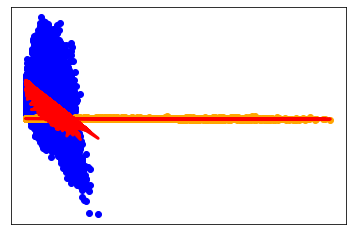

Text(0.5, 0, 'Velocity of Tox')

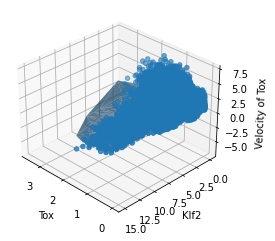

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

transcription_factors = vdata[:, ['Tox', 'Klf2']].layers['Ms']
velocities = vdata[:, ['Tox', 'Klf2']].layers['velocity']


lin = LinearRegression()
lin.fit( transcription_factors, velocities)


# Make predictions using transcriptionfactors
velocity_y_pred = lin.predict(transcription_factors)

# Plot outputs
plt.scatter(vdata[:, ['Tox']].layers['Ms'], vdata[:, ['Tox']].layers['velocity'], color='blue')
plt.scatter(vdata[:, ['Klf2']].layers['Ms'], vdata[:, ['Klf2']].layers['velocity'], color='orange')
plt.plot(transcription_factors, velocity_y_pred, color='red', linewidth=3)

#dont really know what they are for, from the example on sklearn
plt.xticks(())
plt.yticks(())

plt.show()



# 3D plot, I dont believe this is useful..

plt3d = plt.figure().gca(projection='3d')
plt3d.view_init(azim=135)
plt3d.plot_trisurf(vdata[:, ['Tox']].layers['Ms'].flatten(), vdata[:, ['Klf2']].layers['Ms'].flatten(), velocity_y_pred[:,0].reshape(-1,1).flatten(), alpha=0.7, antialiased=True)
plt3d.scatter(vdata[:, ['Tox']].layers['Ms'], vdata[:, ['Klf2']].layers['Ms'], vdata[:, ['Tox']].layers['velocity'])

plt3d.set_xlabel('Tox')
plt3d.set_ylabel('Klf2')
plt3d.set_zlabel('Velocity of Tox')


Text(0.5, 0, 'Amount of Transcriptionfactor')

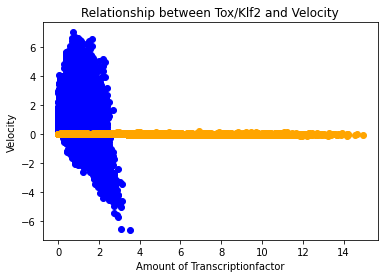

In [9]:
# Scatterplot of Transcriptionfactors Tox and Klf2

##### I dont think there is anything to be gained here..


plt.scatter(vdata[:, ['Tox']].layers['Ms'], vdata[:, ['Tox']].layers['velocity'], color='blue')
plt.scatter(vdata[:, ['Klf2']].layers['Ms'], vdata[:, ['Klf2']].layers['velocity'], color='orange')

# plot description
plt.title('Relationship between Tox/Klf2 and Velocity')
plt.ylabel('Velocity')
plt.xlabel('Amount of Transcriptionfactor')

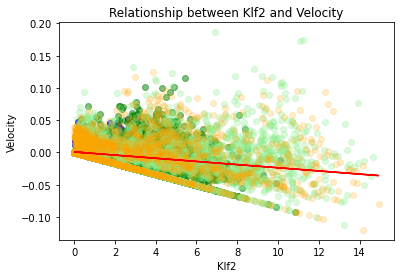

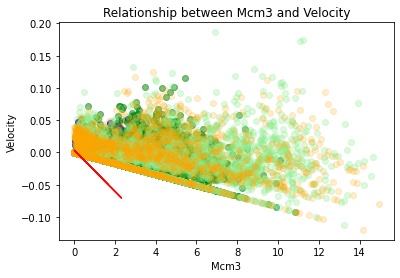

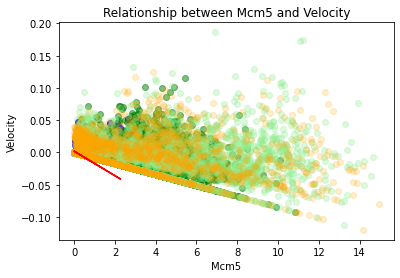

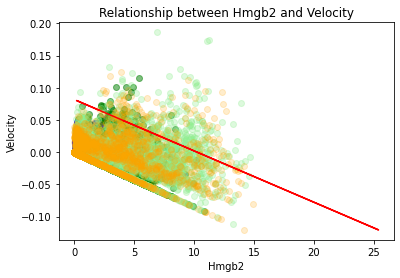

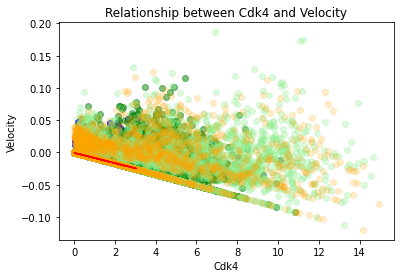

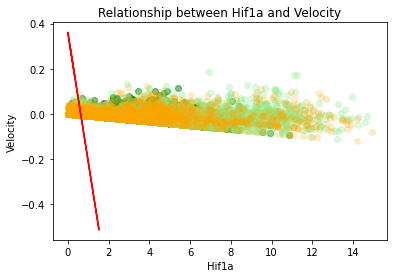

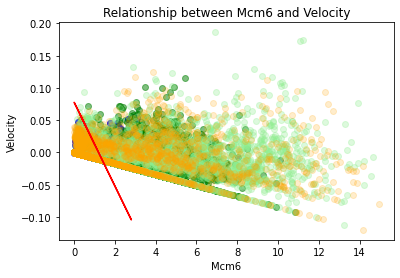

In [10]:
# Scatterplots of Transcriptionfactor expression and Velocity along with slope from linear regression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


lin = LinearRegression()



# Make predictions using individual transcriptionfactors
##### Junb txn not valid?

for txn in ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6']:
    
    plt.figure()
    
    # individual colors for different states
    for s in ['0', '1', '2', '3']:
        
        ##### Am I maybe changing the data here?
        txn_values = vdata[vdata.obs['sampleID']==s, :][:, 'Klf2'].layers['Ms']
        velocity_values = vdata[vdata.obs['sampleID']==s, :][:, 'Klf2'].layers['velocity']
        
        if s=='0': 
            color='blue'
            alpha=1
        if s=='1':
            color='green'
            alpha=0.5
        if s=='2':
            color='lightgreen'
            alpha=0.3
        if s=='3':
            color='orange'
            alpha=0.2
        plt.scatter(txn_values, velocity_values, color=color, alpha=alpha)
        
    
    # plot labels
    plt.title('Relationship between '+txn+' and Velocity')
    plt.xlabel(txn)
    plt.ylabel('Velocity')
    
    
    ##### For some reason the linear lines are skewed. it must have to do with what we do up there. 
    # linear fit
    txn_values = vdata[:, [txn]].layers['Ms']
    velocity_values = vdata[:, [txn]].layers['velocity']
    
    lin.fit(txn_values, velocity_values)
    velocity_y_pred = lin.predict(txn_values)
    
    plt.plot(txn_values, velocity_y_pred, color='red')
                                  
    
    

ValueError: x and y must be the same size

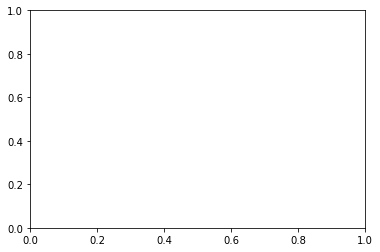

In [3]:
# Scatterplots of Transcriptionfactor expression and Velocity along with slope from linear regression

##### With working linear regression!


lin = LinearRegression()


# Make predictions using individual transcriptionfactors
# Junb txn not valid?

for txn in ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6']:
    
    txn_values = vdata[:, [txn]].layers['Ms']
    velocity_values = vdata.layers['velocity']

    
    plt.figure()
    plt.scatter(txn_values, velocity_values)
    
    # plot labels
    plt.title('Relationship between '+txn+' and Velocity')
    plt.xlabel(txn)
    plt.ylabel('Velocity')
    
    
    # linear fit
    lin.fit(txn_values, velocity_values)
    velocity_y_pred = lin.predict(txn_values)
    
    plt.plot(txn_values, velocity_y_pred, color='red')
                                  
    
    

ValueError: x and y must be the same size

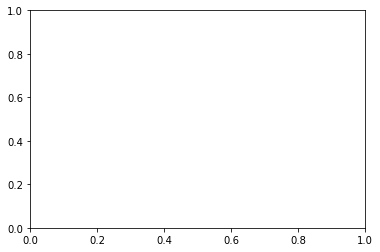

In [3]:
# Scatterplots of Transcriptionfactor expression and Velocity along with slope from linear regression

##### With working linear regression!


lin = LinearRegression()


# Make predictions using individual transcriptionfactors
# Junb txn not valid?

for txn in ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6']:
    
    txn_values = vdata[:, [txn]].layers['Ms']
    velocity_values = vdata.layers['velocity']

    
    plt.figure()
    plt.scatter(txn_values, velocity_values)
    
    # plot labels
    plt.title('Relationship between '+txn+' and Velocity')
    plt.xlabel(txn)
    plt.ylabel('Velocity')
    
    
    # linear fit
    lin.fit(txn_values, velocity_values)
    velocity_y_pred = lin.predict(txn_values)
    
    plt.scatter(txn_values, velocity_values)
    
    plt.plot(txn_values, velocity_y_pred, color='red')
                                  
    
    

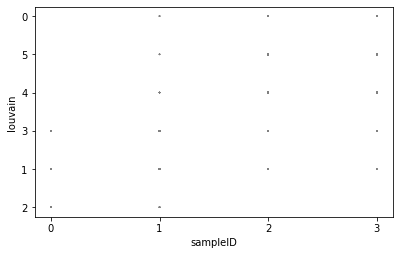

In [12]:
# Why cant I access the txn directly? Can I make my own annData to work with? That would be cool. 
# sc.pl.scatter(vdata, x = 'Klf2', y = 'velocity')


# this works but does not tell me anything. 
sc.pl.scatter(vdata, x='sampleID', y='louvain')

<class 'anndata._core.views.ArrayView'>


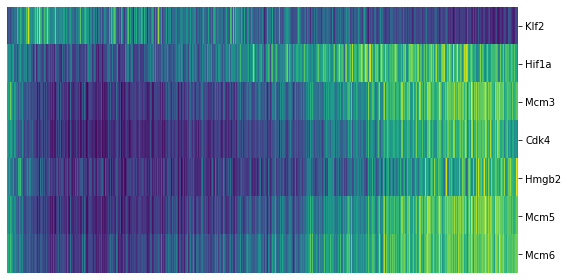

In [15]:
# Heatmap with 8 relevant genes vs the velocity

import seaborn as sn

##### I dont think heatmaps will work. This is categorical data that would be in the cells. Which genes have this combi of velocity and gene expression. 
##### Well, on the other hand, might still be interesting. If we only have 8 genes. 
data = vdata[:, ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6']].layers['Ms']


##### trouble with the sortby function.
scv.pl.heatmap(vdata, ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6'], sortby='initial_size_unspliced')